In [1]:
import pandas as pd
import seaborn as sns
import new_lib as nl
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import acquire

import warnings
warnings.filterwarnings("ignore")

In [2]:
# All imports required to explore the data

In [26]:
telco = acquire.get_telco_data(nl.get_db_url)
telco = telco.iloc[:, 1:]
telco = telco.drop(['gender', 'senior_citizen', 'partner', 'phone_service', 'tech_support', 'streaming_tv', 
                    'streaming_movies', 'paperless_billing', 'internet_service_type', 'online_security', 'online_backup', 
                    'device_protection', 'internet_service_type_id'], axis =1)
telco

# Aquiring the Telco data and dropping the Unnamed 0 column to give a dataframe containing the dataset

,payment_type_id,contract_type_id,customer_id,dependents,tenure,multiple_lines,monthly_charges,total_charges,churn,contract_type,payment_type
0,2,2,0002-ORFBO,Yes,9,No,65.60,593.3,No,One year,Mailed check
1,2,1,0003-MKNFE,No,9,Yes,59.90,542.4,No,Month-to-month,Mailed check
2,1,1,0004-TLHLJ,No,4,No,73.90,280.85,Yes,Month-to-month,Electronic check
3,1,1,0011-IGKFF,No,13,No,98.00,1237.85,Yes,Month-to-month,Electronic check
4,2,1,0013-EXCHZ,No,3,No,83.90,267.4,Yes,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...
7038,2,2,9987-LUTYD,No,13,No,55.15,742.9,No,One year,Mailed check
7039,1,1,9992-RRAMN,No,22,Yes,85.10,1873.7,Yes,Month-to-month,Electronic check
7040,2,1,9992-UJOEL,No,2,No,50.30,92.75,No,Month-to-month,Mailed check
7041,2,3,9993-LHIEB,Yes,67,No,67.85,4627.65,No,Two year,Mailed check


In [27]:
combos = (['payment_type_id', 'contract_type_id', 'dependents', 'multiple_lines'])
for var in combos:
    chi2, p, degf, expected = chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(telco.churn, telco[var]))
    if p <= .05:
        print(f'Comparing relationship between churn and {var}')
        print(chi2, p)
        print('------------------')
        print('\n')
        
# Using a chi2 test to determine the main drivers behind the churn at Telco 
# Does not include payments yet, have to drop na and make a seperate test below

Comparing relationship between churn and payment_type_id
648.1423274814 3.6823546520097993e-140
------------------


Comparing relationship between churn and contract_type_id
1184.5965720837926 5.863038300673391e-258
------------------


Comparing relationship between churn and dependents
189.12924940423474 4.9249216612154196e-43
------------------


Comparing relationship between churn and multiple_lines
11.33044148319756 0.0034643829548773
------------------




In [28]:
telco_test = telco.dropna()
telco_test.total_charges = telco_test.total_charges.replace(' ', 0).astype(float)
# Dropping any null values and converting all the remaining numbers into floats
# Makes it easier to use stats to ttest the charges and churn

In [29]:
combos = ['monthly_charges', 'total_charges']
for var in combos:
    churn = telco_test[telco_test.churn == 'Yes'][var]
    not_churned = telco_test[telco_test.churn == 'No'][var]
    t, p = stats.ttest_ind(churn, not_churned, equal_var = False)
    print(f'Comparing relationship between churn and {var}')
    print(t, p)
    print('------------------')
    print('\n')
# T test for the charges because they we are comparing a catagorical variable to a continuous one
# The code will print the results in a similar format to the chi2 test above

Comparing relationship between churn and monthly_charges
18.407526676414673 8.59244933154705e-73
------------------


Comparing relationship between churn and total_charges
-18.70661828817703 5.902580609073978e-75
------------------




In [47]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = nl.train_vailidate_test_split(telco, 'churn')
# Creating splits for the data using custom libraray function

In [48]:
train

,payment_type_id,contract_type_id,customer_id,dependents,tenure,multiple_lines,monthly_charges,total_charges,churn,contract_type,payment_type
1320,2,1,1963-VAUKV,No,1,No,20.40,20.4,Yes,Month-to-month,Mailed check
6590,2,1,9367-OIUXP,No,4,No,20.70,73.05,No,Month-to-month,Mailed check
3490,3,1,4945-RVMTE,No,28,No,59.55,1646.45,No,Month-to-month,Bank transfer (automatic)
4745,3,3,6685-XSHHU,Yes,60,No,20.95,1270.55,No,Two year,Bank transfer (automatic)
3268,4,3,4671-VJLCL,No,63,Yes,79.85,4861.45,No,Two year,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...
4890,1,1,6892-EZDTG,No,4,Yes,91.65,365.4,Yes,Month-to-month,Electronic check
1831,4,1,2669-QVCRG,No,41,Yes,81.30,3190.65,No,Month-to-month,Credit card (automatic)
4341,2,1,6124-ACRHJ,No,1,No,19.75,19.75,No,Month-to-month,Mailed check
996,1,3,1447-PJGGA,No,57,No,95.25,5464.65,Yes,Two year,Electronic check


<AxesSubplot:xlabel='contract_type', ylabel='count'>

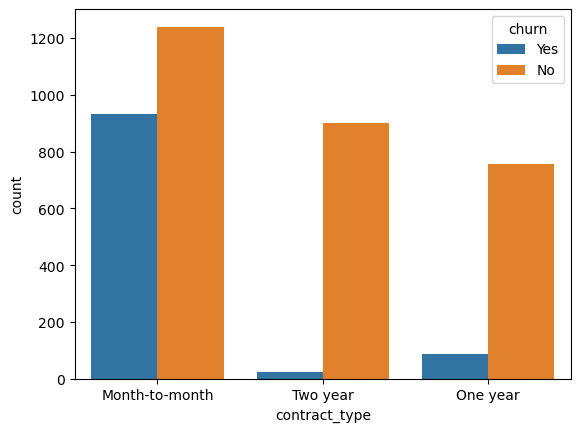

In [46]:
sns.countplot(x = train.contract_type, hue = train.churn)
# Creating a count plot for contract_type hued by churn to visualize churn by each contract type